<a href="https://colab.research.google.com/github/chamberlinkevin/meteostat_polars_demo/blob/main/Weather_Project_Polars_Meteostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌤️ Weather Data Project with Polars and Meteostat

In this project, you'll use Python to:
- Fetch real-world weather data from [Meteostat](https://dev.meteostat.net/python/), an open-source Weather tool
- Analyze it using [Polars](https://pola.rs/), a fast and friendly DataFrame library
- Visualize it with [matplotlib](https://matplotlib.org/), an industry standard
graphing library

This is a great way to explore Python libraries, data types, and thinking like a data problem-solver!

In [ ]:
!pip install polars meteostat matplotlib

In [ ]:
from datetime import datetime, timedelta
from meteostat import Daily, Point
import meteostat
import polars as pl
import matplotlib.pyplot as plt

## 📅 Set the Date Range

In [ ]:
end = datetime.today()
start = end - timedelta(days=30)
print(f"Start: {start.date()}, End: {end.date()}")

Start: 2025-06-15, End: 2025-07-15


## 📍 Choose a Location

In [ ]:
# New York City by default; you can change to any lat/lon
location = Point(40.7128, -74.0060)

## 🌡️ Get Weather Data from Meteostat

In [ ]:
data = Daily(location, start, end)
df = data.fetch()

# Convert to Polars DataFrame
pl_df = pl.from_pandas(df.reset_index())
pl_df.head()

time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
datetime[ns],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2025-06-16 00:00:00,18.3,15.7,21.0,1.7,0.0,null,14.0,null,1020.3,null
2025-06-17 00:00:00,18.9,16.8,22.0,1.7,0.0,null,7.2,null,1017.5,null
2025-06-18 00:00:00,23.2,18.2,32.0,10.2,0.0,null,2.6,null,1013.6,null
2025-06-19 00:00:00,26.4,21.3,33.9,2.5,0.0,null,8.2,null,1009.1,null
2025-06-20 00:00:00,25.2,18.6,31.1,0.2,0.0,null,13.2,null,1012.2,null


### NOTE: Read the docs! Python packages often have documentation that is very useful. You can visit the Meteostat website to read the documentation, or run the cell below to view it in your notebook!
[Meteostat Developers Link](https://dev.meteostat.net/python/)

In [ ]:
help(meteostat)

Help on package meteostat:

NAME
    meteostat

DESCRIPTION
    █▀▄▀█ █▀▀ ▀█▀ █▀▀ █▀█ █▀ ▀█▀ ▄▀█ ▀█▀
    █░▀░█ ██▄ ░█░ ██▄ █▄█ ▄█ ░█░ █▀█ ░█░
    
    A Python library for accessing open weather and climate data
    
    Meteorological data provided by Meteostat (https://dev.meteostat.net)
    under the terms of the Creative Commons Attribution-NonCommercial
    4.0 International Public License.
    
    The code is licensed under the MIT license.

PACKAGE CONTENTS
    core (package)
    enumerations (package)
    interface (package)
    series (package)
    units
    utilities (package)

CLASSES
    builtins.object
        meteostat.interface.base.Base
            meteostat.interface.stations.Stations
        meteostat.interface.point.Point
    meteostat.interface.meteodata.MeteoData(meteostat.interface.base.Base)
        meteostat.interface.normals.Normals
        meteostat.interface.timeseries.TimeSeries
            meteostat.interface.daily.Daily
            meteostat.interface.hou

## 🪛 Manipulate the Data

In [ ]:
# 1. Filter rows where average temp is above 25°C
hot_days = pl_df.filter(pl_df["tavg"] > 25)
print("Hot Days (>25°C):")
print(hot_days)

Hot Days (>25°C):
shape: (21, 11)
┌─────────────────────┬──────┬──────┬──────┬───┬──────┬──────┬────────┬──────┐
│ time                ┆ tavg ┆ tmin ┆ tmax ┆ … ┆ wspd ┆ wpgt ┆ pres   ┆ tsun │
│ ---                 ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---  ┆ ---  ┆ ---    ┆ ---  │
│ datetime[ns]        ┆ f64  ┆ f64  ┆ f64  ┆   ┆ f64  ┆ f64  ┆ f64    ┆ f64  │
╞═════════════════════╪══════╪══════╪══════╪═══╪══════╪══════╪════════╪══════╡
│ 2025-06-19 00:00:00 ┆ 26.4 ┆ 21.3 ┆ 33.9 ┆ … ┆ 8.2  ┆ null ┆ 1009.1 ┆ null │
│ 2025-06-20 00:00:00 ┆ 25.2 ┆ 18.6 ┆ 31.1 ┆ … ┆ 13.2 ┆ null ┆ 1012.2 ┆ null │
│ 2025-06-21 00:00:00 ┆ 26.5 ┆ 21.1 ┆ 32.2 ┆ … ┆ 8.2  ┆ null ┆ 1018.9 ┆ null │
│ 2025-06-22 00:00:00 ┆ 27.6 ┆ 22.0 ┆ 34.9 ┆ … ┆ 12.6 ┆ null ┆ 1017.6 ┆ null │
│ 2025-06-23 00:00:00 ┆ 31.6 ┆ 26.6 ┆ 37.4 ┆ … ┆ 5.2  ┆ null ┆ 1018.2 ┆ null │
│ …                   ┆ …    ┆ …    ┆ …    ┆ … ┆ …    ┆ …    ┆ …      ┆ …    │
│ 2025-07-08 00:00:00 ┆ 28.4 ┆ 24.7 ┆ 35.9 ┆ … ┆ 10.1 ┆ null ┆ 1015.0 ┆ null │
│ 2025-07-09 00:00

In [ ]:
# 2. Find the hottest day
hottest_day = pl_df.sort("tmax", descending=True).select(["time", "tmax"]).head(1)
print("\nHottest Day:")
print(hottest_day)



Hottest Day:
shape: (1, 2)
┌─────────────────────┬──────┐
│ time                ┆ tmax │
│ ---                 ┆ ---  │
│ datetime[ns]        ┆ f64  │
╞═════════════════════╪══════╡
│ 2025-06-24 00:00:00 ┆ 42.8 │
└─────────────────────┴──────┘


In [ ]:
# 3. Total precipitation
total_precip = pl_df.select(pl.col("prcp").sum().alias("total_precip_mm"))
print("\nTotal Precipitation:")
print(total_precip)



Total Precipitation:
shape: (1, 1)
┌─────────────────┐
│ total_precip_mm │
│ ---             │
│ f64             │
╞═════════════════╡
│ 93.9            │
└─────────────────┘


In [ ]:
# 4. 7-day rolling average temperature
rolling_avg = pl_df.select([
    "time",
    pl.col("tavg").rolling_mean(window_size=7).alias("tavg_7d_avg")
])
print("\n7-Day Rolling Average Temperature:")
print(rolling_avg)



7-Day Rolling Average Temperature:
shape: (30, 2)
┌─────────────────────┬─────────────┐
│ time                ┆ tavg_7d_avg │
│ ---                 ┆ ---         │
│ datetime[ns]        ┆ f64         │
╞═════════════════════╪═════════════╡
│ 2025-06-16 00:00:00 ┆ null        │
│ 2025-06-17 00:00:00 ┆ null        │
│ 2025-06-18 00:00:00 ┆ null        │
│ 2025-06-19 00:00:00 ┆ null        │
│ 2025-06-20 00:00:00 ┆ null        │
│ …                   ┆ …           │
│ 2025-07-11 00:00:00 ┆ 26.342857   │
│ 2025-07-12 00:00:00 ┆ 26.328571   │
│ 2025-07-13 00:00:00 ┆ 26.014286   │
│ 2025-07-14 00:00:00 ┆ 25.8        │
│ 2025-07-15 00:00:00 ┆ 25.328571   │
└─────────────────────┴─────────────┘


In [ ]:
# 5. Add daily temperature range column
with_temp_range = pl_df.with_columns([
    (pl.col("tmax") - pl.col("tmin")).alias("temp_range")
])
print("\nTemperature Range Column:")
print(with_temp_range)



Temperature Range Column:
shape: (30, 12)
┌─────────────────────┬──────┬──────┬──────┬───┬──────┬────────┬──────┬────────────┐
│ time                ┆ tavg ┆ tmin ┆ tmax ┆ … ┆ wpgt ┆ pres   ┆ tsun ┆ temp_range │
│ ---                 ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---  ┆ ---    ┆ ---  ┆ ---        │
│ datetime[ns]        ┆ f64  ┆ f64  ┆ f64  ┆   ┆ f64  ┆ f64    ┆ f64  ┆ f64        │
╞═════════════════════╪══════╪══════╪══════╪═══╪══════╪════════╪══════╪════════════╡
│ 2025-06-16 00:00:00 ┆ 18.3 ┆ 15.7 ┆ 21.0 ┆ … ┆ null ┆ 1020.3 ┆ null ┆ 5.3        │
│ 2025-06-17 00:00:00 ┆ 18.9 ┆ 16.8 ┆ 22.0 ┆ … ┆ null ┆ 1017.5 ┆ null ┆ 5.2        │
│ 2025-06-18 00:00:00 ┆ 23.2 ┆ 18.2 ┆ 32.0 ┆ … ┆ null ┆ 1013.6 ┆ null ┆ 13.8       │
│ 2025-06-19 00:00:00 ┆ 26.4 ┆ 21.3 ┆ 33.9 ┆ … ┆ null ┆ 1009.1 ┆ null ┆ 12.6       │
│ 2025-06-20 00:00:00 ┆ 25.2 ┆ 18.6 ┆ 31.1 ┆ … ┆ null ┆ 1012.2 ┆ null ┆ 12.5       │
│ …                   ┆ …    ┆ …    ┆ …    ┆ … ┆ …    ┆ …      ┆ …    ┆ …          │
│ 2025-07-11 00:00:00 

In [ ]:
# 6. Max wind gust and when it happened
max_gust = pl_df.sort("wpgt", descending=True).select(["time", "wpgt"]).head(1)
print("\nMax Wind Gust:")
print(max_gust)



Max Wind Gust:
shape: (1, 2)
┌─────────────────────┬──────┐
│ time                ┆ wpgt │
│ ---                 ┆ ---  │
│ datetime[ns]        ┆ f64  │
╞═════════════════════╪══════╡
│ 2025-07-15 00:00:00 ┆ null │
└─────────────────────┴──────┘


In [ ]:
# 7. Weekly average temperature
weekly_avg = (
    pl_df.with_columns([
        pl.col("time").dt.week().alias("week")
    ])
    .group_by("week")
    .agg([
        pl.col("tavg").mean().alias("weekly_avg_temp")
    ])
)
print("\nWeekly Average Temperature:")
print(weekly_avg)



Weekly Average Temperature:
shape: (5, 2)
┌──────┬─────────────────┐
│ week ┆ weekly_avg_temp │
│ ---  ┆ ---             │
│ i8   ┆ f64             │
╞══════╪═════════════════╡
│ 27   ┆ 26.2            │
│ 26   ┆ 28.014286       │
│ 29   ┆ 25.4            │
│ 28   ┆ 26.014286       │
│ 25   ┆ 23.728571       │
└──────┴─────────────────┘


In [ ]:
# 8. Categorize temperature
categorized = pl_df.with_columns([
    pl.when(pl.col("tavg") >= 25).then(pl.lit("Hot"))
      .when(pl.col("tavg") >= 15).then(pl.lit("Mild"))
      .otherwise(pl.lit("Cold"))
      .alias("temp_category")
])
print("\nTemperature Categories:")
print(categorized)



Temperature Categories:
shape: (30, 12)
┌─────────────────────┬──────┬──────┬──────┬───┬──────┬────────┬──────┬───────────────┐
│ time                ┆ tavg ┆ tmin ┆ tmax ┆ … ┆ wpgt ┆ pres   ┆ tsun ┆ temp_category │
│ ---                 ┆ ---  ┆ ---  ┆ ---  ┆   ┆ ---  ┆ ---    ┆ ---  ┆ ---           │
│ datetime[ns]        ┆ f64  ┆ f64  ┆ f64  ┆   ┆ f64  ┆ f64    ┆ f64  ┆ str           │
╞═════════════════════╪══════╪══════╪══════╪═══╪══════╪════════╪══════╪═══════════════╡
│ 2025-06-16 00:00:00 ┆ 18.3 ┆ 15.7 ┆ 21.0 ┆ … ┆ null ┆ 1020.3 ┆ null ┆ Mild          │
│ 2025-06-17 00:00:00 ┆ 18.9 ┆ 16.8 ┆ 22.0 ┆ … ┆ null ┆ 1017.5 ┆ null ┆ Mild          │
│ 2025-06-18 00:00:00 ┆ 23.2 ┆ 18.2 ┆ 32.0 ┆ … ┆ null ┆ 1013.6 ┆ null ┆ Mild          │
│ 2025-06-19 00:00:00 ┆ 26.4 ┆ 21.3 ┆ 33.9 ┆ … ┆ null ┆ 1009.1 ┆ null ┆ Hot           │
│ 2025-06-20 00:00:00 ┆ 25.2 ┆ 18.6 ┆ 31.1 ┆ … ┆ null ┆ 1012.2 ┆ null ┆ Hot           │
│ …                   ┆ …    ┆ …    ┆ …    ┆ … ┆ …    ┆ …      ┆ …    ┆ …      

In [ ]:
# 9. Days with no wind
no_wind = pl_df.filter(pl.col("wspd") == 0).select(["time", "wspd"])
print("\nDays with No Wind:")
print(no_wind)



Days with No Wind:
shape: (0, 2)
┌──────────────┬──────┐
│ time         ┆ wspd │
│ ---          ┆ ---  │
│ datetime[ns] ┆ f64  │
╞══════════════╪══════╡
└──────────────┴──────┘


In [ ]:
# 10. Count of snowy days
snowy_days = pl_df.filter(pl.col("snow") > 0).select(pl.count().alias("snowy_days"))
print("\nSnowy Days Count:")
print(snowy_days)



Snowy Days Count:
shape: (1, 1)
┌────────────┐
│ snowy_days │
│ ---        │
│ u32        │
╞════════════╡
│ 0          │
└────────────┘


## 📈 Plot the Daily Average Temperature

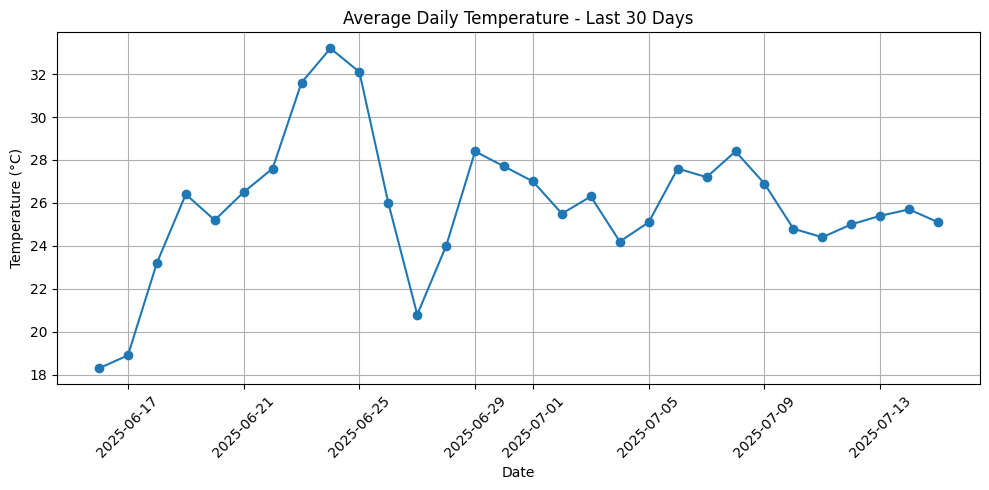

In [ ]:
# Extract dates and temperatures
dates = pl_df['time'].to_list()
temps = pl_df['tavg'].to_list()

plt.figure(figsize=(10, 5))
plt.plot(dates, temps, marker='o')
plt.title("Average Daily Temperature - Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 💡 Challenges

Try one or more of these stretch goals:

- 🔄 Change the location to your city (use latitude and longitude)
- 🔍 Find the hottest and coldest day
- 📊 Plot minimum and maximum temperatures
- 📉 Add a moving average to smooth the plot